## Частина третя: Аналіз датасет c Kaggle.com

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

- Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
df = pd.read_csv('./bestsellers with categories.csv')

- Виведіть перші п'ять рядків (використовується функція head)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
df.shape

(550, 7)

- Про скільки книг зберігає дані датасет? **Відповідь: 550 книг**

In [5]:
len(df.index)

550

Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:
- Name - назва книги
- Author - автор
- User Rating - рейтинг (за 5-бальною шкалою)
- Reviews - кількість відгуків
- Price - ціна (у доларах станом на 2020 рік)
- Year - рік, коли книга потрапила до рейтингу Топ-50
- Genre - жанр

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(3)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


### Первинне дослідження даних

- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [7]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

- Чи є в якихось змінних пропуски? (Так / ні) - ***Ні***

- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [8]:
df.genre.unique

<bound method Series.unique of 0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: genre, Length: 550, dtype: object>

- Які є унікальні жанри? - ***Fiction, Non Fiction***

- Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

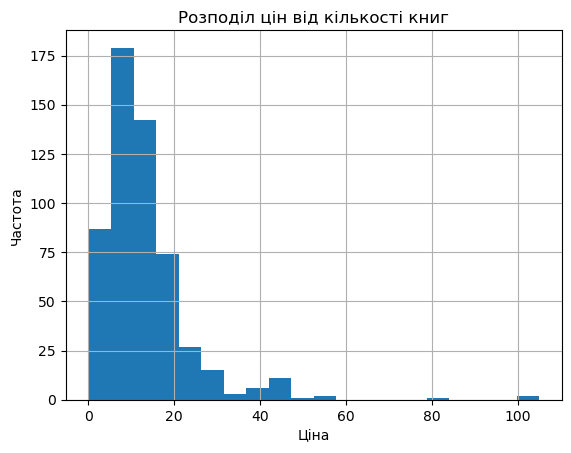

In [9]:
df.price.plot(kind='hist', title='Розподіл цін від кількості книг', bins=20)
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.grid()
plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [10]:
df.price.describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

- Максимальна ціна? ***Відповідь: 105***

In [11]:
df.price.max()

105

- Мінімальна ціна? ***Відповідь: 0***

In [12]:
df.price.min()

0

- Середня ціна? ***Відповідь: 13.1***

In [13]:
df.price.mean()

13.1

- Медіанна ціна? ***Відповідь: 11.0***

In [14]:
df.price.median()

11.0

### Пошук та сортування даних

- Який рейтинг у датасеті найвищий? ***Відповідь: 4.9***

In [15]:
print(f'Найвищий рейтинг - {df.user_rating.max()}')

Найвищий рейтинг - 4.9


- Скільки книг мають такий рейтинг? ***Відповідь: 52 з дублями / 28 без дублів***

In [16]:
df[df.user_rating == 4.9].name.count()

52

In [17]:
df[df.user_rating == 4.9].name.drop_duplicates().count()

28

- Яка книга має найбільше відгуків? ***Відповідь:Where the Crawdads Sing***

In [18]:
df[df.reviews == df.reviews.max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


- З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? ***Відповідь: Publication Manual of the American Psychological Association, 6th Edition***

In [19]:
max_price = df[df.year == 2015].price.max()
df[(df.year == 2015) & (df.price == max_price)]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


- Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? ***Відповідь: 20 книг***

In [20]:
df.head()
df[(df.genre == 'Fiction') & (df.year == 2010)].drop_duplicates().count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

- Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? ***Відповідь: 1 книга***

In [21]:
df[(df.user_rating == 4.9) & (df.year.isin([2010, 2011]))]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


- І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [22]:
df[(df.year == 2015) & (df.price < 8)].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


- Яка книга остання у відсортованому списку? ***Відповідь: Old School (Diary of a Wimpy Kid #10)***	

### Агрегування даних та з'єднання таблиць

- Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [23]:
df.groupby('genre').agg({'price': ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

- Максимальна ціна для жанру Fiction: ***Відповідь: 82***
- Відповідь: Мінімальна ціна для жанру Fiction: ***Відповідь: 0***
- Відповідь: Максимальна ціна для жанру Non Fiction: ***Відповідь: 105***
- Відповідь: Мінімальна ціна для жанру Non Fiction: ***Відповідь: 0***

- Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [24]:
autor_books = df.groupby('author').agg({'name': ['count']})
autor_books.sort_values(('name', 'count'), ascending=False)

,name
,count
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
...,...
David Grann,1
Larry Schweikart,1


- Якої розмірності вийшла таблиця? ***Відповідь: 248 x 1***
- Який автор має найбільше книг? ***Відповідь: Jeff Kinney***
- Скільки книг цього автора? ***Відповідь: 12 книг***

- Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [25]:
author_rate = df.groupby('author').agg({'user_rating': ['mean']}).round(2)
author_rate.sort_values(('user_rating', 'mean'), ascending=False)

,user_rating
,mean
author,
Rush Limbaugh,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
...,...
Paula Hawkins,4.1
Muriel Barbery,4.0


- У якого автора середній рейтинг мінімальний? ***Відповідь: Donna Tartt***
- Який у цього автора середній рейтинг? ***Відповідь: 3.9***

- З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [26]:
final_df = pd.concat([autor_books, author_rate], axis=1)
final_df.tail()

,name,user_rating
,count,mean
author,,
Walter Isaacson,3,4.57
William Davis,2,4.40
William P. Young,2,4.60
Wizards RPG Team,3,4.80
Zhi Gang Sha,2,4.60


- Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [27]:
final_df.sort_values(([('name','count'), ('user_rating', 'mean')]), ascending=[True, True])


,name,user_rating
,count,mean
author,,
Muriel Barbery,1,4.00
Chris Cleave,1,4.10
Ian K. Smith M.D.,1,4.10
Pierre Dukan,1,4.10
Elizabeth Strout,1,4.20
...,...,...
American Psychological Association,10,4.50
Suzanne Collins,11,4.66


- Який автор перший у списку? ***Відповідь: Muriel Barbery***